# Energy Consumption Prediction for Smart Homes
Goal: Build a regression model to predict energy consumption of home appliances based on temperature, humidity, and other environmental factors. Helps in designing energy-efficient smart home automation.

In [104]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [105]:
df=pd.read_csv("energydata_complete.csv")
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27-05-2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,27-05-2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,27-05-2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27-05-2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


In [106]:
print("The shape of the dataset:",df.shape)

The shape of the dataset: (19735, 29)


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [108]:
print("The columns in the dataset:",df.columns)

The columns in the dataset: Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')


In [109]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


In [110]:
duplicates = df.isnull().sum()
print("Duplicates in the dataset:")
print(duplicates)

Duplicates in the dataset:
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


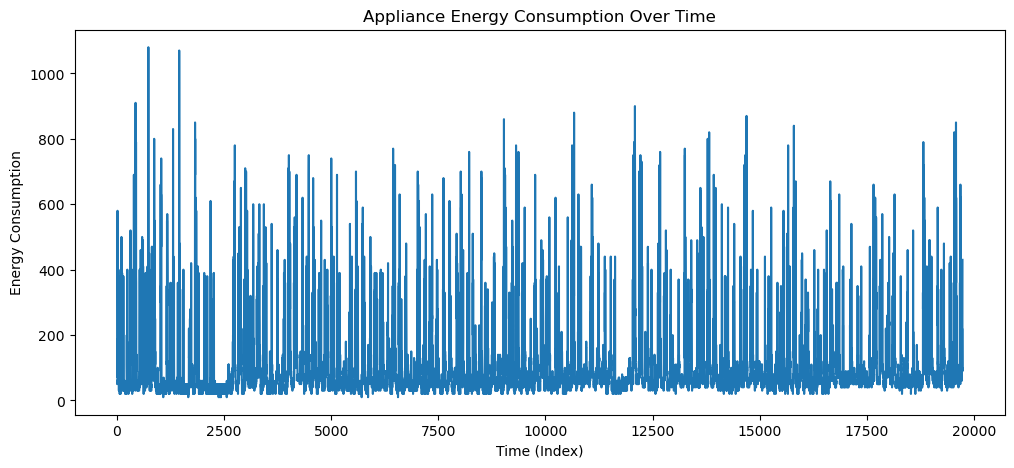

In [111]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=df.index, y=df["Appliances"])
plt.title("Appliance Energy Consumption Over Time")
plt.xlabel("Time (Index)")
plt.ylabel("Energy Consumption")
plt.show()

In [112]:
# Drop unnecessary column
df.drop(columns=['date'], inplace=True)

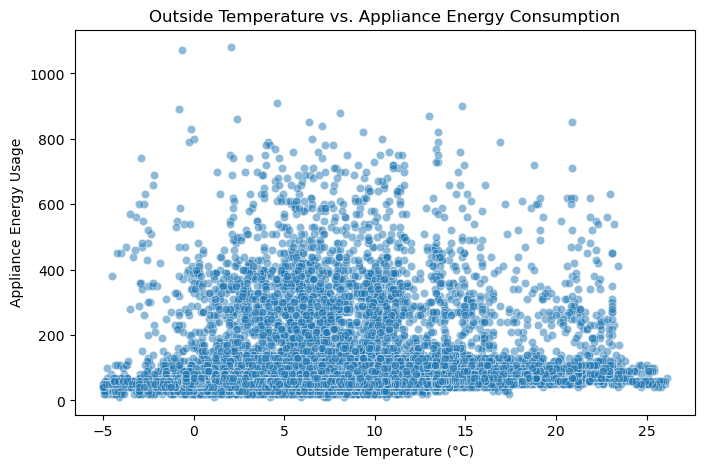

In [113]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["T_out"], y=df["Appliances"], alpha=0.5)
plt.title("Outside Temperature vs. Appliance Energy Consumption")
plt.xlabel("Outside Temperature (°C)")
plt.ylabel("Appliance Energy Usage")
plt.show()

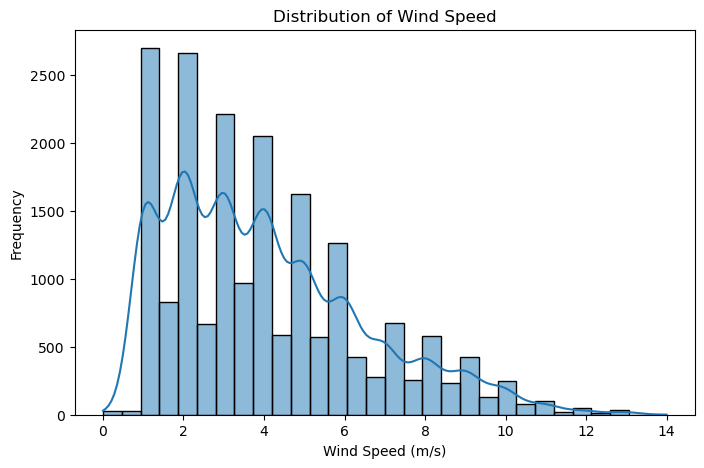

In [114]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Windspeed"], bins=30, kde=True)
plt.title("Distribution of Wind Speed")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

In [115]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [116]:
print("Skewness values for each column:")
df.skew()

Skewness values for each column:


Appliances     3.386367
lights         2.195155
T1             0.120917
RH_1           0.465774
T2             0.889658
RH_2          -0.268247
T3             0.450777
RH_3           0.467589
T4             0.170384
RH_4           0.444614
T5             0.558220
RH_5           1.866820
T6             0.597471
RH_6          -0.241961
T7             0.254722
RH_7           0.242141
T8            -0.256151
RH_8           0.308036
T9             0.382711
RH_9           0.368937
T_out          0.534302
Press_mm_hg   -0.420442
RH_out        -0.922997
Windspeed      0.859982
Visibility     0.441554
Tdewpoint      0.239975
rv1            0.004945
rv2            0.004945
dtype: float64

The ideal skewness value should be close to 0 for a normal distribution. However, in practical scenarios:
* -0.5 to 0.5 → Fairly Symmetrical
* -1 to -0.5 or 0.5 to 1 → Moderately Skewed
* Less than -1 or Greater than 1 → Highly Skewed

Highly Skewed (Needs Transformation)
* Appliances (3.386367) → Strongly right-skewed
* lights (2.195155) → Highly right-skewed
* RH_5 (1.866820) → Highly right-skewed
* Windspeed (0.859982) → Moderately right-skewed
  
Moderately Skewed (Mild Transformation May Help)
* T2 (0.889658) → Right-skewed
* T_out (0.534302) → Right-skewed
* RH_9 (0.368937) → Slight right skew
* T9 (0.382711) → Slight right skew
  
Fairly Symmetrical (No Transformation Needed)
* Tdewpoint (0.239975), RH_7 (0.242141), T7 (0.254722) → Close to normal distribution

Moderately Left-Skewed
* RH_out (-0.922997) → Moderately left-skewed
* Press_mm_hg (-0.420442) → Slight left skew
* T8 (-0.256151) → Slight left skew

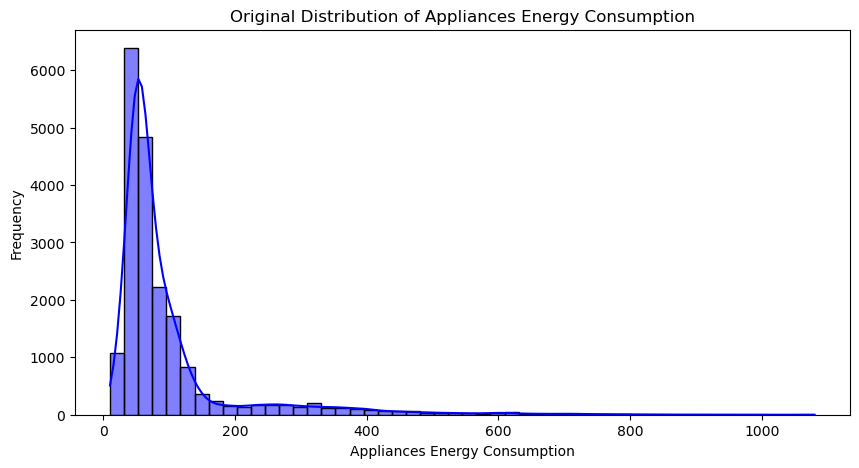

In [119]:
# Plot the original distribution of Appliances
plt.figure(figsize=(10, 5))
sns.histplot(df["Appliances"], bins=50, kde=True, color='blue')
plt.title("Original Distribution of Appliances Energy Consumption")
plt.xlabel("Appliances Energy Consumption")
plt.ylabel("Frequency")
plt.show()

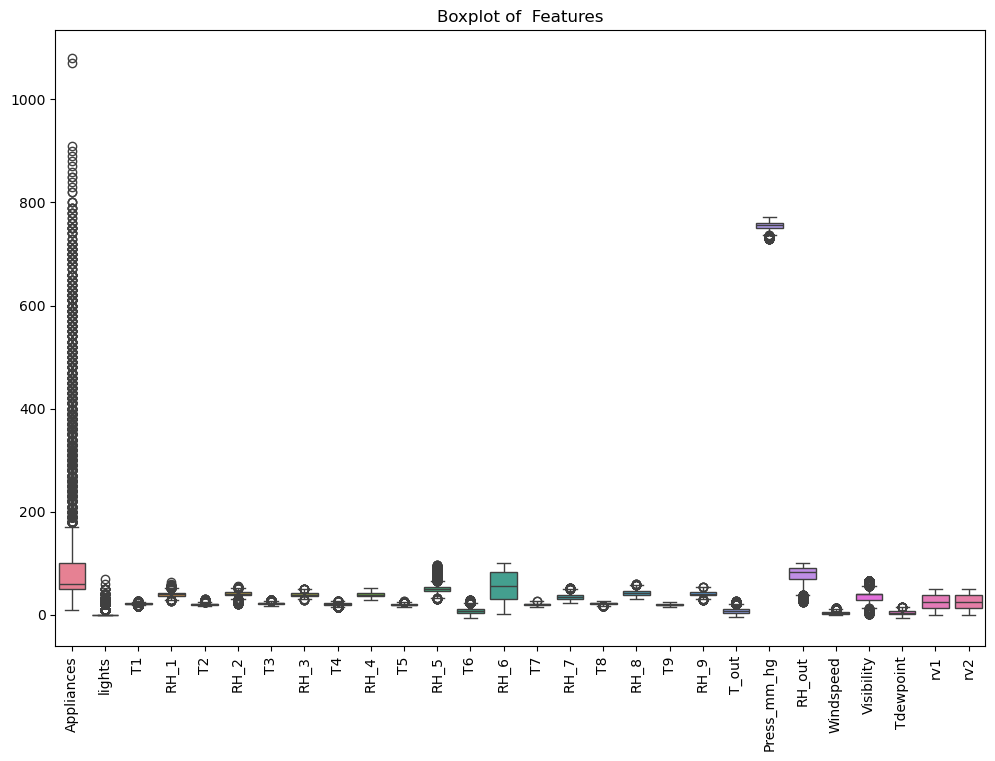

In [120]:
# Boxplot to view outliers
plt.figure(figsize=(12, 8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

Columns That Should Be Transformed (Highly Skewed)
1. Right-Skewed
* Appliances (3.386367)
* lights (2.195155)
* RH_5 (1.866820)
* Windspeed (0.859982)
* T2 (0.889658) 

2. Left-Skewed 
* RH_out (-0.922997) 

In [122]:
# Apply Log Transformation for columns - "Appliances", "lights", "RH_5", "Windspeed", "T2"
cols_to_log = ["Appliances", "lights", "RH_5", "Windspeed", "T2"]
df[cols_to_log] = np.log1p(df[cols_to_log])

In [123]:
# Apply IQR transformation method for column - "RH_out"
Q1 = df["RH_out"].quantile(0.25)
Q3 = df["RH_out"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df["RH_out"] >= lower_bound) & (df["RH_out"] <= upper_bound)]

In [124]:
# Review skewness
df.skew()

Appliances     1.190418
lights         1.392110
T1             0.117512
RH_1           0.528765
T2             0.580099
RH_2          -0.069142
T3             0.467066
RH_3           0.468824
T4             0.185610
RH_4           0.449892
T5             0.571855
RH_5           1.261486
T6             0.555091
RH_6          -0.253443
T7             0.273993
RH_7           0.234134
T8            -0.242122
RH_8           0.303955
T9             0.401014
RH_9           0.357046
T_out          0.459814
Press_mm_hg   -0.418716
RH_out        -0.774234
Windspeed     -0.035791
Visibility     0.440530
Tdewpoint      0.235035
rv1            0.004173
rv2            0.004173
dtype: float64

In [125]:
# Handle skewness for the 2nd time 

In [126]:
cols_to_log = ["Appliances", "lights"]
df[cols_to_log] = np.log1p(df[cols_to_log])

In [127]:
Q1 = df["RH_out"].quantile(0.25)
Q3 = df["RH_out"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df["RH_out"] >= lower_bound) & (df["RH_out"] <= upper_bound)]

In [128]:
df.skew()

Appliances     0.805079
lights         1.318499
T1             0.120448
RH_1           0.530693
T2             0.580864
RH_2          -0.042579
T3             0.470631
RH_3           0.466542
T4             0.190053
RH_4           0.447610
T5             0.575930
RH_5           1.269635
T6             0.552760
RH_6          -0.255813
T7             0.277709
RH_7           0.232455
T8            -0.238394
RH_8           0.301088
T9             0.404629
RH_9           0.353665
T_out          0.455323
Press_mm_hg   -0.417631
RH_out        -0.753350
Windspeed     -0.033386
Visibility     0.440177
Tdewpoint      0.233594
rv1            0.004036
rv2            0.004036
dtype: float64

Applying outlier removal multiple times (more than necessary) can lead to data inconsistencies and information loss. Thus stopping here

In [130]:
df.shape

(19441, 28)

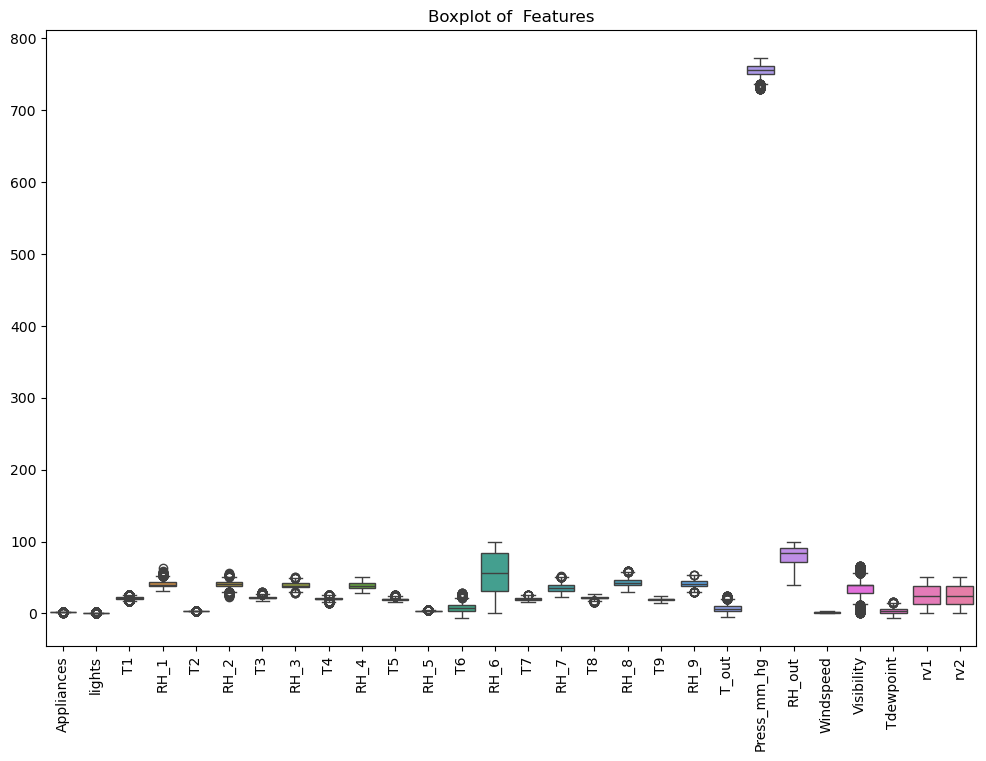

In [131]:
plt.figure(figsize=(12, 8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

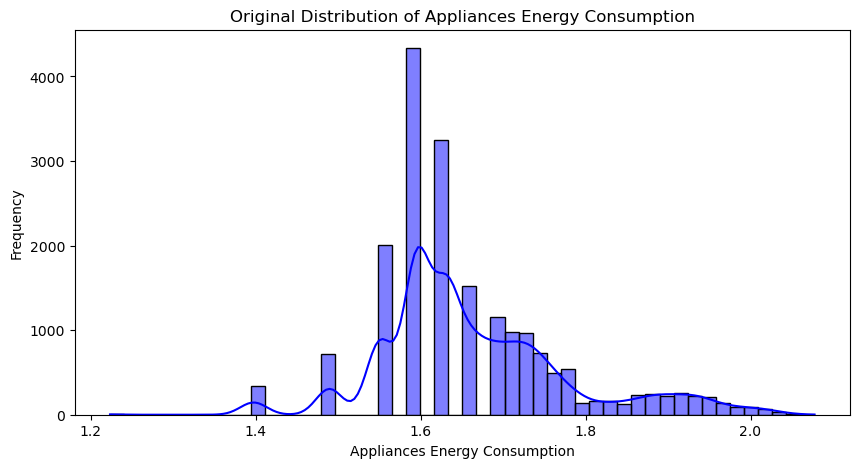

In [132]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Appliances"], bins=50, kde=True, color='blue')
plt.title("Original Distribution of Appliances Energy Consumption")
plt.xlabel("Appliances Energy Consumption")
plt.ylabel("Frequency")
plt.show()

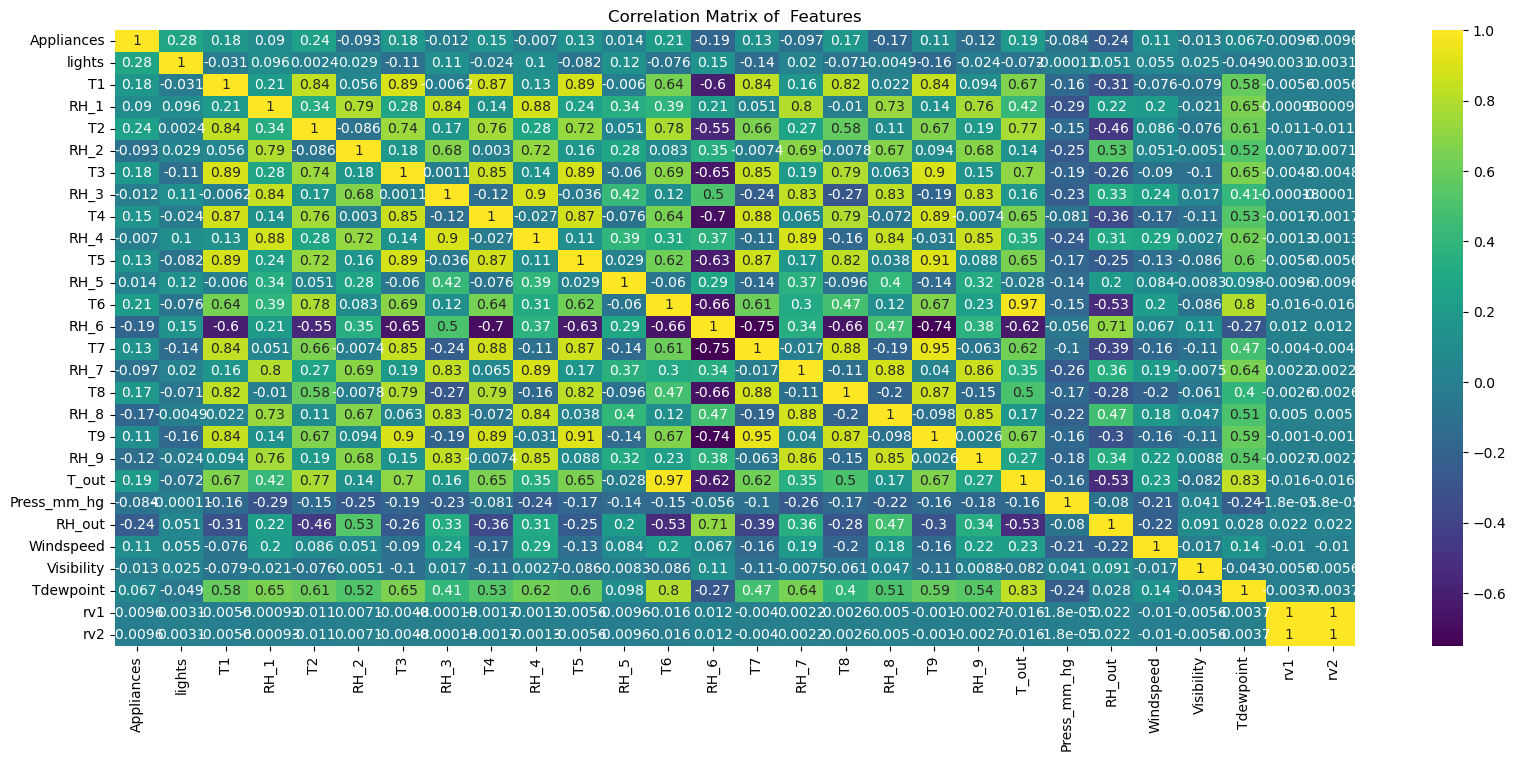

In [133]:
# Correlation Matrix 
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of  Features')
plt.show()